# <b> <u>Jammer Classification: </u> </b>
### Example Notebook Showing how you can train and save the modeles!
### Step1: Import All Dependencies!

In [1]:
# Install the dependencies from the requirements.txt

!pip install -q -r requirements.txt

# Import tensor flow and keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

# tensorflow hub is used to load the models
!pip install -q tensorflow_hub
import tensorflow_hub as hub

import numpy as np

# Import Matplot lib, Library to plot the results and graphs
import matplotlib.pylab as plt 

# Argument parser to set variables
import options

# import dataloader
from util import dataLoader

# import generate model module
from CNN import generate_model

### Define the Functions for Training and Plotting logs


In [2]:
def plot_logs(history):
    print(history.history)
    acc = history.history['accuracy']
    

    loss = history.history['loss']
    

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Categorical Cross Entropy')
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training Loss')
    plt.show()

In [3]:
#use Pre Trained Models for Fine Tuning
def usePreTrain(args):
    # Generate Data Loader
    dataloader = dataLoader.DataLoader(args)
    train_data_gen, val_data_gen = dataloader.dataGenerator()
    
    #genrateModel
    generateModel = generate_model.Generate_model(args, dataloader.num_classes)
    model = generateModel.preTrainedModel()
    
    # Fit your Training Data
    history = model.fit(train_data_gen, epochs=args.num_epochs, verbose=2,shuffle = True,
                        steps_per_epoch= dataloader.num_train_images // args.batch_size,
                  )
    #     history = model.fit_generator(
    #                     train_data_gen,
    #                     steps_per_epoch=dataloader.num_train_images // args.batch_size,
    #                     epochs=args.num_epochs,
    #                     validation_data=val_data_gen,
    #                     validation_steps=dataloader.num_val_images // args.batch_size
    #                 )

    # Save the Model
    keras.experimental.export_saved_model(model, args.save_dir)
    
    #Plot the Training Logs
    plot_logs(history)
    

### Step2: Setup all Required Variables

##### Delete sys.argv(req for ipython Kernels)

In [4]:
# Try to parse Argument from options.py
import sys; sys.argv=['']; del sys
args = options.parseArguments()

#Set the mode to train or usePreTrain
args.mode = "usePreTrain"
args.freeze_feature_layers = True

# Pre-Trained model to use
args.pre_trained_model_name = "inception_v3"
args.model_url = "https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(args.pre_trained_model_name)

# Set the Dataset Directory
args.input_dir = "/media/aadmin/SamsungSSD/PROJECT-DATA/SIGENCE/Train_Val_Test/dataset/"

# Set the image Dimensions and batch size according to the pre-trained model's requirement Check it on tf-hub
args.img_h = args.img_w = 299
args.batch_size = 50
args.num_epochs = 15

# Set the load directory, where trained models and graphs are saved
args.save_dir = "./checkpoints/4_Classes/"



#### Start Training

Initializing DataLoader ...
Looking for the data at --> /media/aadmin/SamsungSSD/PROJECT-DATA/SIGENCE/Train_Val_Test/dataset/
Classes : ['01_ChirpJammerSignals', '02_ChirpUnknownSignals', '03_InterferenceSignals', '04_NarrowBandSignals'] -----------
Training Data Loader
Found 7600 images belonging to 4 classes.
Validation Data Loader
Found 400 images belonging to 4 classes.
Do Fine Tuning of feature layers :  False
Building model from -->  https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total p

Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: ./checkpoints/4_Classes/saved_model.pb


INFO:tensorflow:SavedModel written to: ./checkpoints/4_Classes/saved_model.pb


{'loss': [0.6282644787509191, 0.5357317285318124, 0.5164474921399042, 0.5057966262102127, 0.5003540937445665, 0.4920848613899005, 0.4929088183531636, 0.487291743880824, 0.4841701200133876, 0.48257780173107195, 0.47985994345263433, 0.4795371503814271, 0.47573955298254367, 0.47556165664603833, 0.47470332603705556], 'accuracy': [0.8739474, 0.9206579, 0.9331579, 0.9375, 0.94078946, 0.94342107, 0.94078946, 0.94631577, 0.9481579, 0.9480263, 0.94934213, 0.95039475, 0.9501316, 0.9501316, 0.95342106]}


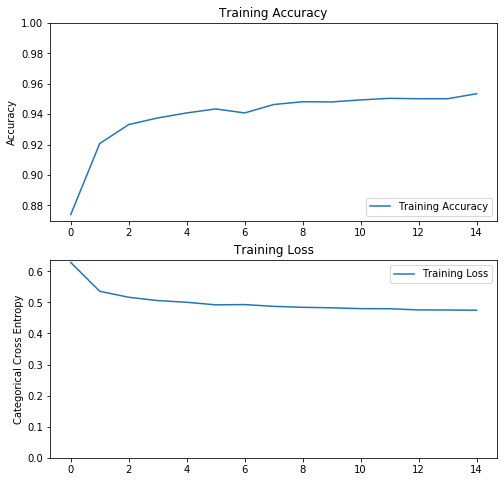

In [5]:
if args.mode == "usePreTrain":
    usePreTrain(args)

elif args.mode=="train":
    train(args)
    